In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
import imutils

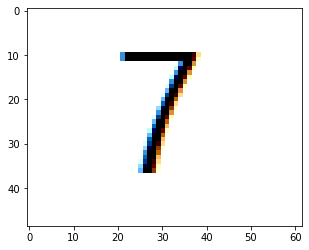

In [3]:
image = cv2.imread("7big.png")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

In [4]:
image.shape

(49, 62, 3)

In [5]:
max(image.shape)

62

In [6]:
min(image.shape)

3

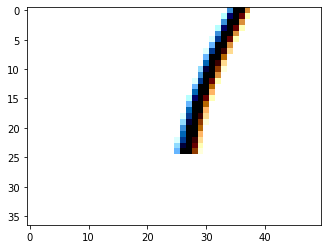

In [7]:
croped = image[12:62, 0:50]
plt.imshow(croped)

In [8]:
croped.shape

(37, 50, 3)

In [3]:
def crop_and_reshape (image):
    size = image.shape
    h = size[0]
    w = size[1]
    if (h == 28) and (w == 28):
        return image
    if h > w:
        reduced = imutils.resize(image, width=28)
        mid = reduced.shape[0] // 2
        croped = reduced[(mid-14):(mid+14), 0:28]
    elif h < w:
        reduced = imutils.resize(image, height=28)
        mid = reduced.shape[1] // 2
        croped = reduced[0:28, (mid-14):(mid+14)]
    else:
        croped = imutils.resize(image, height=28)
    return croped

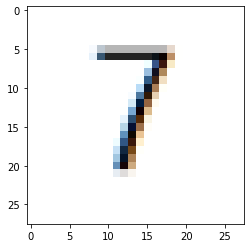

In [10]:
figfinal = crop_and_reshape(image)
plt.imshow(figfinal)

In [11]:
def loadimage(figname):
    '''
    It takes the name of the file and loads it in grey scale
    Input: name of the file
    Output: the image in greyscale
    '''
    print(figname)
    image = cv2.imread(figname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [12]:
name = "Num7.png"
loadimage(name)

Num7.png


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 207, 191,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 191, 255, 255, 255, 255, 255,
        255, 207,  16,  16, 207, 255, 255, 249,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
inverted = cv2.bitwise_not(image)


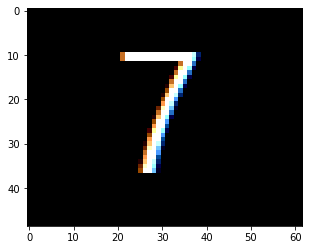

In [14]:
plt.imshow(inverted)

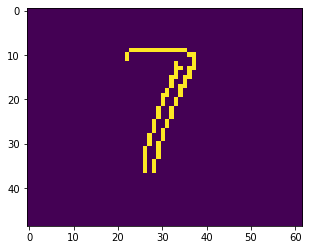

In [15]:
edged = cv2.Canny(image, 0, 0)
plt.imshow(edged)

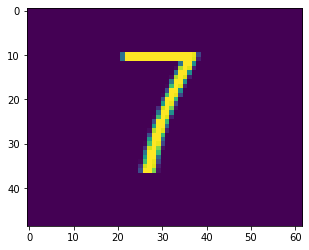

In [16]:
imgray = cv2.cvtColor(inverted, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)

In [17]:
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

In [18]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [19]:
contours[0]

array([[[22, 10]],

       [[22, 11]],

       [[34, 11]],

       [[35, 12]],

       [[34, 13]],

       [[34, 14]],

       [[33, 15]],

       [[33, 16]],

       [[32, 17]],

       [[32, 18]],

       [[31, 19]],

       [[31, 20]],

       [[30, 21]],

       [[30, 23]],

       [[29, 24]],

       [[29, 25]],

       [[28, 26]],

       [[28, 28]],

       [[27, 29]],

       [[27, 32]],

       [[26, 33]],

       [[26, 36]],

       [[28, 36]],

       [[28, 33]],

       [[29, 32]],

       [[29, 29]],

       [[30, 28]],

       [[30, 26]],

       [[31, 25]],

       [[31, 24]],

       [[32, 23]],

       [[32, 21]],

       [[33, 20]],

       [[33, 19]],

       [[34, 18]],

       [[34, 17]],

       [[35, 16]],

       [[35, 15]],

       [[36, 14]],

       [[36, 13]],

       [[37, 12]],

       [[37, 10]]], dtype=int32)

In [20]:
cnt = contours[0]
cv2.drawContours(inverted, [cnt], 0, (0,255,0), 3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

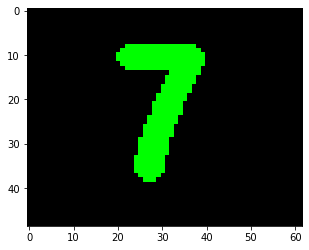

In [21]:
plt.imshow(inverted)

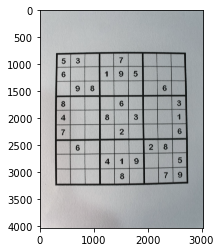

In [4]:
sudoku = cv2.imread("IMG_1290.jpg")
plt.imshow(sudoku)

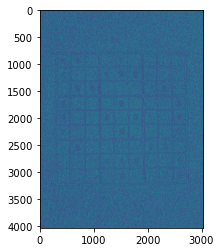

In [5]:
edge_sudoku = cv2.Canny(sudoku, 0, 0)
plt.imshow(edge_sudoku)

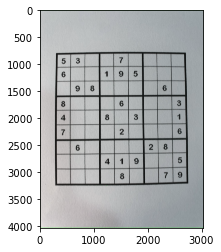

In [9]:
imgray = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[7]
cv2.drawContours(sudoku, [cnt], 0, (0,255,0), 3)
plt.imshow(sudoku)

In [25]:
contours

[array([[[665, 665]],
 
        [[665, 743]],
 
        [[743, 743]],
 
        [[743, 665]]], dtype=int32),
 array([[[583, 665]],
 
        [[583, 743]],
 
        [[662, 743]],
 
        [[662, 665]]], dtype=int32),
 array([[[500, 665]],
 
        [[500, 743]],
 
        [[580, 743]],
 
        [[580, 665]]], dtype=int32),
 array([[[547, 683]],
 
        [[548, 682]],
 
        [[570, 682]],
 
        [[571, 683]],
 
        [[571, 687]],
 
        [[570, 688]],
 
        [[553, 688]],
 
        [[552, 689]],
 
        [[552, 693]],
 
        [[551, 694]],
 
        [[551, 697]],
 
        [[550, 698]],
 
        [[550, 699]],
 
        [[551, 699]],
 
        [[552, 698]],
 
        [[554, 698]],
 
        [[555, 697]],
 
        [[562, 697]],
 
        [[563, 698]],
 
        [[564, 698]],
 
        [[565, 699]],
 
        [[566, 699]],
 
        [[571, 704]],
 
        [[571, 705]],
 
        [[572, 706]],
 
        [[572, 708]],
 
        [[573, 709]],
 
        [[573, 716]],
 
 

In [10]:
def marcosudoku (namefile):
    sudoku = cv2.imread(namefile)
    plt.imshow(sudoku)
    imgray = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)
    plt.imshow(imgray)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    area_max = 0
    cnt = contours[1]
    for cont in contours[1:]:
        area = cv2.contourArea(cont)
        if area > area_max:
            area_max = area
            cnt = cont
    frame = cv2.drawContours(sudoku, [cnt], 0, (0,255,0), 3)
    
    return sudoku 

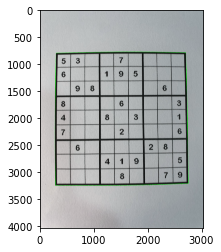

In [11]:
test = marcosudoku("IMG_1290.jpg")
plt.imshow(test)

In [28]:
cv2.contourArea(contours[2])

6240.0

In [29]:
cv2.arcLength(contours[2], closed=True)

316.0

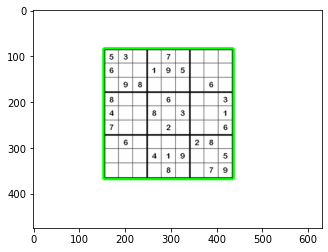

In [30]:
sudoku = cv2.imread("Sudokufondo.png")

plt.imshow(sudoku)
imgray = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[1]
frame = cv2.drawContours(sudoku, [cnt], 0, (0,255,0), 3)
plt.imshow(sudoku)

h1 = cnt[0,0,1]
h2 = cnt[4,0,1]
w1 = cnt[1,0,0]
w2 = cnt[5,0,0]

cropped = sudoku[h1:h2, w1:w2]

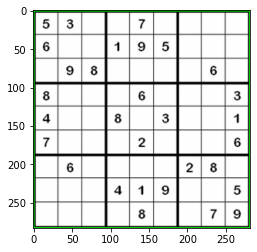

In [31]:
plt.imshow(cropped)

In [32]:
cnt

array([[[153,  84]],

       [[154,  83]],

       [[436,  83]],

       [[437,  84]],

       [[437, 367]],

       [[436, 368]],

       [[154, 368]],

       [[153, 367]]], dtype=int32)

In [33]:
cnt[1,0,0]

154

In [34]:
cnt[0,0,1]

84

In [35]:
cnt[5,0,0]

436

In [36]:
cnt[4,0,1]

367

In [37]:
def sudoku_cut_frames_1 (filename):
    sudoku = cv2.imread(filename)
    imgray = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)


    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[1]
    frame = cv2.drawContours(sudoku, [cnt], 0, (0,255,0), 3)


    h1 = cnt[0,0,1]
    h2 = cnt[4,0,1]
    w1 = cnt[1,0,0]
    w2 = cnt[5,0,0]

    cropped = sudoku[h1:h2, w1:w2]
    return cropped

In [38]:
recorte = sudoku_cut_frames ("sudokuwik.png")

In [39]:
recorte

array([], shape=(0, 17, 3), dtype=uint8)

In [42]:
def sudoku_cut_frame (namefile):
    sudoku = cv2.imread(namefile)
    originalside1 = sudoku.shape[0]
    originalside2 = sudoku.shape[1]
    originalarea = originalside1*originalside1
    
    imgray = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    area_max = 0
    cnt = contours[1]
    for cont in contours[1:]:
        area = cv2.contourArea(cont)
        if area > area_max:
            area_max = area
            cnt = cont
    if originalarea/area_max > 20:
        return sudoku
    
    frame = cv2.drawContours(sudoku, [cnt], 0, (0,255,0), 3)
    h1 = cnt[0,0,1]
    h2 = cnt[4,0,1]
    w1 = cnt[1,0,0]
    w2 = cnt[5,0,0]

    cropped = sudoku[h1:h2, w1:w2]
    return cropped 

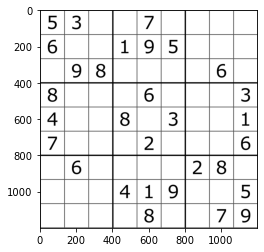

In [43]:
recorte = sudoku_cut_frame("sudokuwik.png")
plt.imshow(recorte)